In [110]:
import pandas as pd
import numpy as np

In [111]:
df = pd.read_csv('train1.csv') 

In [112]:
print(df.head(1000))

     User_ID Product_ID Gender    Age  Occupation City_Category  \
0    1000001  P00069042      F   0-17          10             A   
1    1000001  P00248942      F   0-17          10             A   
2    1000001  P00087842      F   0-17          10             A   
3    1000001  P00085442      F   0-17          10             A   
4    1000002  P00285442      M    55+          16             C   
5    1000003  P00193542      M  26-35          15             A   
6    1000004  P00184942      M  46-50           7             B   
7    1000004  P00346142      M  46-50           7             B   
8    1000004   P0097242      M  46-50           7             B   
9    1000005  P00274942      M  26-35          20             A   
10   1000005  P00251242      M  26-35          20             A   
11   1000005  P00014542      M  26-35          20             A   
12   1000005  P00031342      M  26-35          20             A   
13   1000005  P00145042      M  26-35          20             

In [113]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 12 columns):
User_ID                       65499 non-null int64
Product_ID                    65499 non-null object
Gender                        65499 non-null object
Age                           65499 non-null object
Occupation                    65499 non-null int64
City_Category                 65499 non-null object
Stay_In_Current_City_Years    65499 non-null object
Marital_Status                65499 non-null int64
Product_Category_1            65499 non-null int64
Product_Category_2            44908 non-null float64
Product_Category_3            19886 non-null float64
Purchase                      65499 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 6.0+ MB
None


In [114]:
# From examing data in previous two lines it is evident that there is missing values in  
# columns Product_Category_2, and Product_Category_3
# The Below script iterates through the columns of the dataframe, locates null values, 
# And sums all instances of a null value. If the column contains at least one null value
# Then it sets all instances of the Nan value to 0

for column in df:
    isnul = df[column].isnull()
    totalNull = sum(isnul)
    if totalNull != 0:
        df[column][isnul] = 0
        isnul = df[column].isnull()
        totalNull = sum(isnul)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [115]:
# Quick check that Nan values have been replaced with 0
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 12 columns):
User_ID                       65499 non-null int64
Product_ID                    65499 non-null object
Gender                        65499 non-null object
Age                           65499 non-null object
Occupation                    65499 non-null int64
City_Category                 65499 non-null object
Stay_In_Current_City_Years    65499 non-null object
Marital_Status                65499 non-null int64
Product_Category_1            65499 non-null int64
Product_Category_2            65499 non-null float64
Product_Category_3            65499 non-null float64
Purchase                      65499 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 6.0+ MB


In [116]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Example of hot one encoding 

[How To Hot One Encode Sequence Data In Python](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python// "Title")

In [117]:
# The next four sections of code are from an online example on how to hot one encode data
# I learned how this code works by running each section and then in later rows apply it to my data
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(values)
print(type(values))

['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
<class 'numpy.ndarray'>


In [118]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

[0 0 2 0 1 1 2 0 2 1]


In [119]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]


In [120]:
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['cold']


# Hot One Encoding My Data Based On the Example

## Hot One Encoding Gender

In [121]:
# Define an array containing gender column data from df
gender = array(df['Gender']) 

In [122]:
# integer encode the gender data from the gender array
label_encoder = LabelEncoder()
gender_integer_encoded = label_encoder.fit_transform(gender)
print(gender_integer_encoded)

[0 0 0 ..., 1 1 1]


In [123]:
# binary encode the gender data from the integer encoded data
onehot_encoder = OneHotEncoder(sparse=False)
gender_integer_encoded = gender_integer_encoded.reshape(len(gender_integer_encoded), 1)
gender_onehot_encoded = onehot_encoder.fit_transform(gender_integer_encoded)
print(gender_onehot_encoded)
print(type(gender_onehot_encoded))

[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 ..., 
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]
<class 'numpy.ndarray'>


In [124]:
# Converts the hot one encoded data into a dataframe with columns 'F' for female and 'M' for male
dfGender = pd.DataFrame(data=gender_onehot_encoded, columns=['F','M'])
#print(dfGender)

## Hot One Encoding Age

In [125]:
# Define an array containing age column data from df
ageArray = array(df['Age'])

In [126]:
# integer encode the gender data from the age array
label_encoder = LabelEncoder()
age_integer_encoded = label_encoder.fit_transform(ageArray)
print(age_integer_encoded)

[0 0 0 ..., 2 2 2]


In [127]:
# binary encode the age data from the integer encoded data
onehot_encoder = OneHotEncoder(sparse=False)
age_integer_encoded = age_integer_encoded.reshape(len(age_integer_encoded), 1)
age_onehot_encoded = onehot_encoder.fit_transform(age_integer_encoded)
print(age_onehot_encoded)

[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]]


In [128]:
#Creates a set of column titles based on the age range categories
ageColumns = set(df['Age'])
ageColumns = list(ageColumns)
ageColumns.sort()
print(ageColumns)

['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']


In [129]:
# Converts the hot one encoded data into a dataframe with columns created in previous row
dfAge = pd.DataFrame(data=age_onehot_encoded, columns=ageColumns)
#print(dfAge)

## Hot One Encoding Occupation

In [130]:
#Checking if 0 should be removed as a category
for i in range(0, 19):
    print ("Occupation: ", i, " has", df[df['Occupation']==i]['Occupation'].count(),'people in the cateogry of job.')
    

Occupation:  0  has 8397 people in the cateogry of job.
Occupation:  1  has 5271 people in the cateogry of job.
Occupation:  2  has 3083 people in the cateogry of job.
Occupation:  3  has 2172 people in the cateogry of job.
Occupation:  4  has 8950 people in the cateogry of job.
Occupation:  5  has 1382 people in the cateogry of job.
Occupation:  6  has 2295 people in the cateogry of job.
Occupation:  7  has 7004 people in the cateogry of job.
Occupation:  8  has 200 people in the cateogry of job.
Occupation:  9  has 762 people in the cateogry of job.
Occupation:  10  has 1530 people in the cateogry of job.
Occupation:  11  has 1455 people in the cateogry of job.
Occupation:  12  has 3764 people in the cateogry of job.
Occupation:  13  has 995 people in the cateogry of job.
Occupation:  14  has 3302 people in the cateogry of job.
Occupation:  15  has 1378 people in the cateogry of job.
Occupation:  16  has 2856 people in the cateogry of job.
Occupation:  17  has 4801 people in the cate

In [131]:
# Define an array containing occupation column data from df
occupationArray = array(df['Occupation'])
print(occupationArray.max())
print(occupationArray.min())

20
0


In [132]:
# binary encode the occupation data directly because its raw form was integer encoded
onehot_encoder = OneHotEncoder(sparse=False)
occupation_integer_encoded = occupationArray.reshape(len(occupationArray), 1)
occupation_onehot_encoded = onehot_encoder.fit_transform(occupation_integer_encoded)
print(occupation_onehot_encoded)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [133]:
#Creates a set of column titles based on the occupation categories
occupationColumns = set(df['Occupation'])
occupationColumns = list(occupationColumns)
occupationColumns.sort()
hold = []
for item in occupationColumns:
    temp = str(item) + '_Occupation'
    hold.append(temp)

print(type(hold))
print(hold)

<class 'list'>
['0_Occupation', '1_Occupation', '2_Occupation', '3_Occupation', '4_Occupation', '5_Occupation', '6_Occupation', '7_Occupation', '8_Occupation', '9_Occupation', '10_Occupation', '11_Occupation', '12_Occupation', '13_Occupation', '14_Occupation', '15_Occupation', '16_Occupation', '17_Occupation', '18_Occupation', '19_Occupation', '20_Occupation']


In [134]:
# Converts the hot one encoded data into a dataframe with columns created in previous row
dfOccupation = pd.DataFrame(data=occupation_onehot_encoded, columns= hold)
#print(dfOccupation)

## Hot One Encoding City Category

In [135]:
# Define an array containing city category column data from df
city_catArray = array(df['City_Category'])

In [136]:
# integer encode the city category data
label_encoder = LabelEncoder()
city_cat_integer_encoded = label_encoder.fit_transform(city_catArray)
print(city_cat_integer_encoded)

[0 0 0 ..., 0 0 0]


In [137]:
# binary encode the integer encoded data from previous step
city_cat_onehot_encoder = OneHotEncoder(sparse=False)
city_cat_integer_encoded = city_cat_integer_encoded.reshape(len(city_cat_integer_encoded), 1)
city_cat_onehot_encoded = onehot_encoder.fit_transform(city_cat_integer_encoded)
print(city_cat_onehot_encoded)

[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 ..., 
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]


In [138]:
# creates column names for the city categories
City_Cat_Columns = set(df['City_Category'])
City_Cat_Columns = list(City_Cat_Columns)
City_Cat_Columns.sort()
print(City_Cat_Columns)

['A', 'B', 'C']


In [139]:
# creates a data frame out of the one hot encoded data with column titles created in previous step
dfCityCat = pd.DataFrame(data=city_cat_onehot_encoded, columns=City_Cat_Columns)
#print(dfCityCat)

# Merging Data Frames of One Hot Encoded Data

In [140]:
# creates a single dataframe with the original data frame and all of the hot one encoded data concatenated
df2 = pd.concat([df, dfGender, dfAge, dfOccupation, dfCityCat], axis=1, join='inner')

In [141]:
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,14_Occupation,15_Occupation,16_Occupation,17_Occupation,18_Occupation,19_Occupation,20_Occupation,A,B,C
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [142]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 45 columns):
User_ID                       65499 non-null int64
Product_ID                    65499 non-null object
Gender                        65499 non-null object
Age                           65499 non-null object
Occupation                    65499 non-null int64
City_Category                 65499 non-null object
Stay_In_Current_City_Years    65499 non-null object
Marital_Status                65499 non-null int64
Product_Category_1            65499 non-null int64
Product_Category_2            65499 non-null float64
Product_Category_3            65499 non-null float64
Purchase                      65499 non-null int64
F                             65499 non-null float64
M                             65499 non-null float64
0-17                          65499 non-null float64
18-25                         65499 non-null float64
26-35                         65499 non-null float64
36-45

# Hot One Encoding Product Category Data

In [143]:
# Pseudo code:
# Create three empty 20 x 49125 array
# Loop over product_cat_x 
# Turns corresponding array value to True 
# Adds three arrays together 

In [144]:
df2.Product_Category_1 = df2.Product_Category_1.astype(int)
#print(trainDf.Product_Category_1)
df2.Product_Category_2 = df2.Product_Category_2.astype(int)
#print(trainDf.Product_Category_2)
df2.Product_Category_3 = df2.Product_Category_3.astype(int)
#print(trainDf.Product_Category_3)

In [145]:
# Creates three empty arrays with equivalent rows as the data frame and 
# Eighteen columns to represent each category of product 
x = []
Product_Category_List = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']
for i in range(3):
    temp = np.zeros((65499, 18))
    x.append(temp)

print(x)

[array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]]), array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]]), array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])]


In [146]:
# Iterates over each entry in the product category column x and 
# Sets the corresponding entry in the empty array to a 1
y = []

for product_cat, array in zip(Product_Category_List, x):
    print(product_cat)
    for index, entry in enumerate(df2[product_cat][:]):
        #print(str(index) + ": " + str(entry))
        if entry == 0:
            continue
            
        else:
            array[index, (entry-1)] = 1 
            #print(entry, product_cat)
            
    y.append(array)

Product_Category_1
Product_Category_2
Product_Category_3


In [147]:
# Testing values got updated correctly
print(y[1][0:5,:])

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [148]:
# Sums three arrays together to create a single array containing all product category data hot one encoded 
# Converts array to dataframe 
z = sum(y)
z = pd.DataFrame(z)

# Generates map of new names for occupation data based on old names
newNamesZ = []
for i in range(1, 19):
    temp = str(i) + '_Product_Category'
    newNamesZ.append(temp)
   
oldNamesZ = range(19)
dictionary = dict(zip(oldNamesZ, newNamesZ))

print(dictionary)

{0: '1_Product_Category', 1: '2_Product_Category', 2: '3_Product_Category', 3: '4_Product_Category', 4: '5_Product_Category', 5: '6_Product_Category', 6: '7_Product_Category', 7: '8_Product_Category', 8: '9_Product_Category', 9: '10_Product_Category', 10: '11_Product_Category', 11: '12_Product_Category', 12: '13_Product_Category', 13: '14_Product_Category', 14: '15_Product_Category', 15: '16_Product_Category', 16: '17_Product_Category', 17: '18_Product_Category'}


In [149]:
z = z.rename(columns={0: '1_Product_Category', 1: '2_Product_Category', 2: '3_Product_Category', 3: '4_Product_Category', 4: '5_Product_Category', 5: '6_Product_Category', 6: '7_Product_Category', 7: '8_Product_Category', 8: '9_Product_Category', 9: '10_Product_Category', 10: '11_Product_Category', 11: '12_Product_Category', 12: '13_Product_Category', 13: '14_Product_Category', 14: '15_Product_Category', 15: '16_Product_Category', 16: '17_Product_Category', 17: '18_Product_Category'})
print(z)

       1_Product_Category  2_Product_Category  3_Product_Category  \
0                     0.0                 0.0                 1.0   
1                     1.0                 0.0                 0.0   
2                     0.0                 0.0                 0.0   
3                     0.0                 0.0                 0.0   
4                     0.0                 0.0                 0.0   
5                     1.0                 1.0                 0.0   
6                     1.0                 0.0                 0.0   
7                     1.0                 0.0                 0.0   
8                     1.0                 0.0                 0.0   
9                     0.0                 0.0                 0.0   
10                    0.0                 0.0                 0.0   
11                    0.0                 0.0                 0.0   
12                    0.0                 0.0                 0.0   
13                    1.0         

In [150]:
# Combines product data from previous step to trainDf data frame
df2 = pd.concat([df2, z], axis=1, join='inner')

In [151]:
# Renames all other column names with more accurate/description name
df2 = df2.rename(columns={'Purchase':'Purchase_Amount', 'F': 'Female', 'M': 'Male', '0-17': 'Age_0-17', '18-25': 'Age_18-25', '26-35': 'Age_26-35', '36-45': 'Age_36-45', '46-50': 'Age_46-50', '51-55': 'Age_51-55', '55+':'Age_55+', 'A':'City_Category_A', 'B': 'City_Category_B', 'C':'City_Category_C'})

### Custom Bins for Age and Occupation

In [152]:
df2.iloc[0:5, 20:50]

,Age_55+,0_Occupation,1_Occupation,2_Occupation,3_Occupation,4_Occupation,5_Occupation,6_Occupation,7_Occupation,8_Occupation,...,19_Occupation,20_Occupation,City_Category_A,City_Category_B,City_Category_C,1_Product_Category,2_Product_Category,3_Product_Category,4_Product_Category,5_Product_Category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [153]:
# Combining age bins based on similar statistical characteristics
df2['AgeNew_0-17_55+'] = df2['Age_0-17'] + df2['Age_55+']
df2['AgeNew_26-35'] = df2['Age_26-35']
df2['AgeNew_18-25_36_45'] = df2['Age_36-45'] + df2['Age_18-25']
df2['AgeNew_51+'] = df2['Age_51-55'] + df2['Age_46-50']

In [154]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 67 columns):
User_ID                       65499 non-null int64
Product_ID                    65499 non-null object
Gender                        65499 non-null object
Age                           65499 non-null object
Occupation                    65499 non-null int64
City_Category                 65499 non-null object
Stay_In_Current_City_Years    65499 non-null object
Marital_Status                65499 non-null int64
Product_Category_1            65499 non-null int64
Product_Category_2            65499 non-null int64
Product_Category_3            65499 non-null int64
Purchase_Amount               65499 non-null int64
Female                        65499 non-null float64
Male                          65499 non-null float64
Age_0-17                      65499 non-null float64
Age_18-25                     65499 non-null float64
Age_26-35                     65499 non-null float64
Age_36-45

                 Purchase_Amount  Age_0-17  Age_18-25  Age_26-35  Age_36-45  \
Purchase_Amount         1.000000 -0.005547  -0.013047  -0.000873   0.004673   
Age_0-17               -0.005547  1.000000  -0.080707  -0.133699  -0.082265   
Age_18-25              -0.013047 -0.080707   1.000000  -0.393537  -0.242143   
Age_26-35              -0.000873 -0.133699  -0.393537   1.000000  -0.401132   
Age_36-45               0.004673 -0.082265  -0.242143  -0.401132   1.000000   
Age_46-50              -0.006213 -0.048444  -0.142591  -0.236216  -0.145343   
Age_51-55               0.021286 -0.045711  -0.134549  -0.222893  -0.137146   
Age_55+                 0.004187 -0.033402  -0.098318  -0.162873  -0.100216   

                 Age_46-50  Age_51-55   Age_55+  
Purchase_Amount  -0.006213   0.021286  0.004187  
Age_0-17         -0.048444  -0.045711 -0.033402  
Age_18-25        -0.142591  -0.134549 -0.098318  
Age_26-35        -0.236216  -0.222893 -0.162873  
Age_36-45        -0.145343  -0.137146 

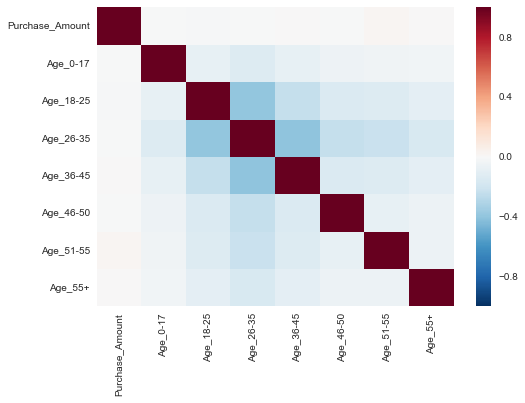

In [155]:
import matplotlib.pyplot as plt

plt.gcf().clear()

Corr = df2.iloc[: , [11, 14, 15, 16, 17, 18, 19, 20]].corr()
print(Corr)

import seaborn as sns
sns.heatmap(Corr)
plt.show()

                 Purchase_Amount  0_Occupation  1_Occupation  2_Occupation  \
Purchase_Amount         1.000000     -0.013193     -0.023740     -0.012743   
0_Occupation           -0.013193      1.000000     -0.113445     -0.085227   
1_Occupation           -0.023740     -0.113445      1.000000     -0.065749   
2_Occupation           -0.012743     -0.085227     -0.065749      1.000000   
3_Occupation            0.004937     -0.071019     -0.054788     -0.041160   
4_Occupation           -0.002011     -0.152558     -0.117692     -0.088417   
5_Occupation            0.004233     -0.056299     -0.043432     -0.032629   
6_Occupation            0.008134     -0.073073     -0.056372     -0.042350   
7_Occupation            0.015896     -0.132694     -0.102367     -0.076905   
8_Occupation            0.006112     -0.021223     -0.016372     -0.012300   
9_Occupation           -0.012277     -0.041604     -0.032096     -0.024112   
10_Occupation          -0.003586     -0.059306     -0.045752    

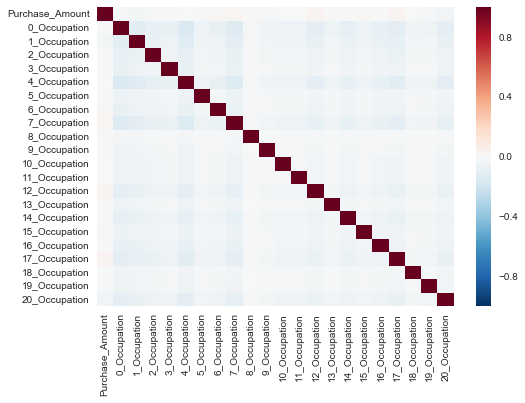

In [156]:
import matplotlib.pyplot as plt

plt.gcf().clear()

Corr = df2.iloc[: , [11, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]].corr()
print(Corr)

import seaborn as sns
sns.heatmap(Corr)
plt.show()

In [157]:
df2['OccupationNew_0-2'] = df2['0_Occupation'] + df2['1_Occupation'] + df2['2_Occupation'] 
df2['OccupationNew_3-5'] = df2['3_Occupation'] + df2['4_Occupation'] + df2['5_Occupation'] 
df2['OccupationNew_6-8'] = df2['6_Occupation'] + df2['7_Occupation'] + df2['8_Occupation'] 
df2['OccupationNew_9-11'] = df2['9_Occupation'] + df2['10_Occupation'] + df2['11_Occupation'] 
df2['OccupationNew_12-14'] = df2['12_Occupation'] + df2['13_Occupation'] + df2['14_Occupation'] 
df2['OccupationNew_15-17'] = df2['15_Occupation'] + df2['16_Occupation'] + df2['17_Occupation'] 
df2['OccupationNew_18-20'] = df2['18_Occupation'] + df2['19_Occupation'] + df2['20_Occupation'] 

In [158]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 74 columns):
User_ID                       65499 non-null int64
Product_ID                    65499 non-null object
Gender                        65499 non-null object
Age                           65499 non-null object
Occupation                    65499 non-null int64
City_Category                 65499 non-null object
Stay_In_Current_City_Years    65499 non-null object
Marital_Status                65499 non-null int64
Product_Category_1            65499 non-null int64
Product_Category_2            65499 non-null int64
Product_Category_3            65499 non-null int64
Purchase_Amount               65499 non-null int64
Female                        65499 non-null float64
Male                          65499 non-null float64
Age_0-17                      65499 non-null float64
Age_18-25                     65499 non-null float64
Age_26-35                     65499 non-null float64
Age_36-45

## Split Data into train (75%) and test (25%) data sets


In [159]:
# Creates location markers for splitting the data frame into a train portion and a test portion
trainDataEndLoc = int(len(df2)*.75)
testDataStartLoc = trainDataEndLoc + 1

In [160]:
# Uses location marker to create train data set
trainDf = df2.iloc[0:trainDataEndLoc,:]
print(trainDf.head(10))
print(trainDf.info())

   User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000001  P00069042      F   0-17          10             A   
1  1000001  P00248942      F   0-17          10             A   
2  1000001  P00087842      F   0-17          10             A   
3  1000001  P00085442      F   0-17          10             A   
4  1000002  P00285442      M    55+          16             C   
5  1000003  P00193542      M  26-35          15             A   
6  1000004  P00184942      M  46-50           7             B   
7  1000004  P00346142      M  46-50           7             B   
8  1000004   P0097242      M  46-50           7             B   
9  1000005  P00274942      M  26-35          20             A   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3           

In [161]:
# Uses location marker to create test data portion
testDf = df2.iloc[0:testDataStartLoc,:]
print(testDf.head(10))
print(testDf.info())

   User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1000001  P00069042      F   0-17          10             A   
1  1000001  P00248942      F   0-17          10             A   
2  1000001  P00087842      F   0-17          10             A   
3  1000001  P00085442      F   0-17          10             A   
4  1000002  P00285442      M    55+          16             C   
5  1000003  P00193542      M  26-35          15             A   
6  1000004  P00184942      M  46-50           7             B   
7  1000004  P00346142      M  46-50           7             B   
8  1000004   P0097242      M  46-50           7             B   
9  1000005  P00274942      M  26-35          20             A   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3           

In [162]:
trainDf.to_csv('trainingDf.csv', index=False)
testDf.to_csv('testingDf.csv', index=False)